In [2]:
from turtle import shape
import nibabel as nib
import os
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2
from PIL import Image
from matplotlib import cm
import pandas as pd
import imblearn
import re
import seaborn as sns

# Setting paths for different folders
FLAIR_scan = r'C:\Users\ellen\Documents\ew-honoursthesis\Data\forAudrey.tar\Normalised\FLAIRinT1space_withLacunes_35.tar'
T1_Lacunes_Incorrect = r'C:\Users\ellen\Documents\ew-honoursthesis\Data\forAudrey.tar\Original\lacune_T1space.tar'
T1_Lacunes_Correct = r'C:\Users\ellen\Documents\ew-honoursthesis\Data\forAudrey.tar\Original\lacune_T1space_JiyangCorrected20210920'
T1_scan = r'C:\Users\ellen\Documents\ew-honoursthesis\Data\forAudrey.tar\Normalised\T1_withLacunes_35.tar'
T1_Soft_Tissue = r'C:\Users\ellen\Documents\ew-honoursthesis\Data\forAudrey.tar\Normalised\T1softTiss_withLacunes_35.tar'
T1_Soft_Tissue_Mask = r'C:\Users\ellen\Documents\ew-honoursthesis\Data\forAudrey.tar\Original\T1softTissMask_withLacunes_35.tar'
T1_Soft_Tissue_Binary_Mask = r'C:\Users\ellen\Documents\ew-honoursthesis\Data\forAudrey.tar\Original\T1softTissMask_withLacunes_35_binary.tar'

(array([1.1266017e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 3.7000000e+01, 1.1740000e+03, 6.3370000e+03,
        1.5234000e+04, 2.5050000e+04, 3.4655000e+04, 4.2493000e+04,
        4.9407000e+04, 5.3738000e+04, 5.6105000e+04, 5.6969000e+04,
        5.6876000e+04, 5.6604000e+04, 5.6106000e+04, 5.5534000e+04,
        5.4392000e+04, 5.3639000e+04, 5.3007000e+04, 5.3214000e+04,
        5.1535000e+04, 4.7157000e+04, 4.0784000e+04, 3.6242000e+04,
        3.3059000e+04, 2.9245000e+04, 2.5579000e+04, 2.2427000e+04,
        1.9579000e+04, 1.6866000e+04, 1.4465000e+04, 1.3048000e+04,
        1.1908000e+04, 1.1158000e+04, 9.7000000e+03, 7.6990000e+03,
        5.9170000e+03, 4.0740000e+03, 2.3110000e+03, 1.2760000e+03,
        6.4000000e+02, 3.1700000e+02, 1.6200000e+02, 7.2000000e+01,
        2.0000000e+01, 1.2000000e+01]),
 array([     0.   ,  14154.265,  28308.53 ,  42462.795,  56617.06 ,
         70771.325,  84925.59 ,  99079.855, 113234.12 , 127388.385,
        

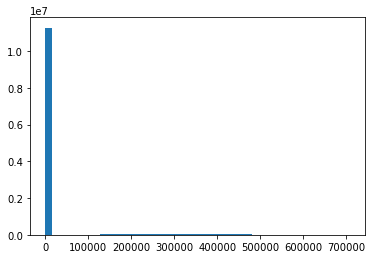

In [61]:
# Histogram of all values
img = nib.load(r'C:\Users\ellen\Documents\ew-honoursthesis\Data\forAudrey.tar\Original\T1softTiss_withLacunes_35.tar\0046_T1softTiss.nii.gz')
data = img.get_fdata()
plt.hist(data.ravel(), bins=50)

In [62]:
len(data[data<0])

0

In [15]:
data[data<0]

array([-56.15296173, -56.15296173, -56.15296173, ..., -56.15296173,
       -56.15296173, -56.15296173])

In [24]:
len(data[31][data[31] < 0])

1108

In [51]:
len(data[29][data[29] < 0])

1873

In [35]:
data[31][120]

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
        -56.15296173,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
        -56.15296173,    0.        ,  -56.15296173,    0.        ,
          0.        ,  -56.15296173,  -56.15296173,  -56.15296173,
       -112.30592346,    0.        ,  -56.15296173,  -56.15296173,
        -56.15296173,  -56.15296173,  -56.15296173,  -56.15296173,
          0.        ,  -56.15296173,    0.        ,    0.        ,
        -56.15296173,  -56.15296173,  -56.15296173,  -56.15296173,
          0.        , -112.30592346, -112.30592346,  -56.15296173,
        -56.15296173,  -56.15296173, -168.45889282, -112.30592346,
       -112.30592346, -112.30592346,  -56.15296173,    0.        ,
          0.        ,    0.        ,   56.15296173,  224.61184

In [55]:
data[29][190]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       -56.15296173,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , -56.15296173,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

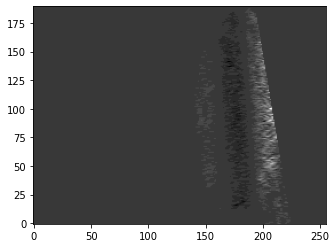

In [45]:
plt.imshow(data[29].T, cmap="gray", origin="lower")
plt.show()